Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets as od
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from numpy import array
from pandas import concat

%matplotlib inline


pd.plotting.register_matplotlib_converters()

In [2]:
od.download("https://www.kaggle.com/datasets/milanzdravkovic/pharma-sales-data?select=salesdaily.csv")

Skipping, found downloaded files in ".\pharma-sales-data" (use force=True to force download)


In [3]:
dailysales = pd.read_csv("C:/Users/sagar/OneDrive/Desktop/projects/pharma-sales-data/salesdaily.csv")
hourlysales = pd.read_csv("C:/Users/sagar/OneDrive/Desktop/projects/pharma-sales-data/saleshourly.csv")
monthlysales = pd.read_csv("C:/Users/sagar/OneDrive/Desktop/projects/pharma-sales-data/salesmonthly.csv")
weeklysales = pd.read_csv("C:/Users/sagar/OneDrive/Desktop/projects/pharma-sales-data/salesweekly.csv")

Seasonality Analysis

C:\Users\sagar\AppData\Local\Temp\ipykernel_18660\4013896483.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(dailysales, x="Month", y=i, ax=j, palette = 'bright')
C:\Users\sagar\AppData\Local\Temp\ipykernel_18660\4013896483.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(dailysales, x="Month", y=i, ax=j, palette = 'bright')
C:\Users\sagar\AppData\Local\Temp\ipykernel_18660\4013896483.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(dailysales, x="Month", y=i, ax=j, palette = 'bright')
C:\Users\sagar\AppData\Local\Temp\ipykernel_18

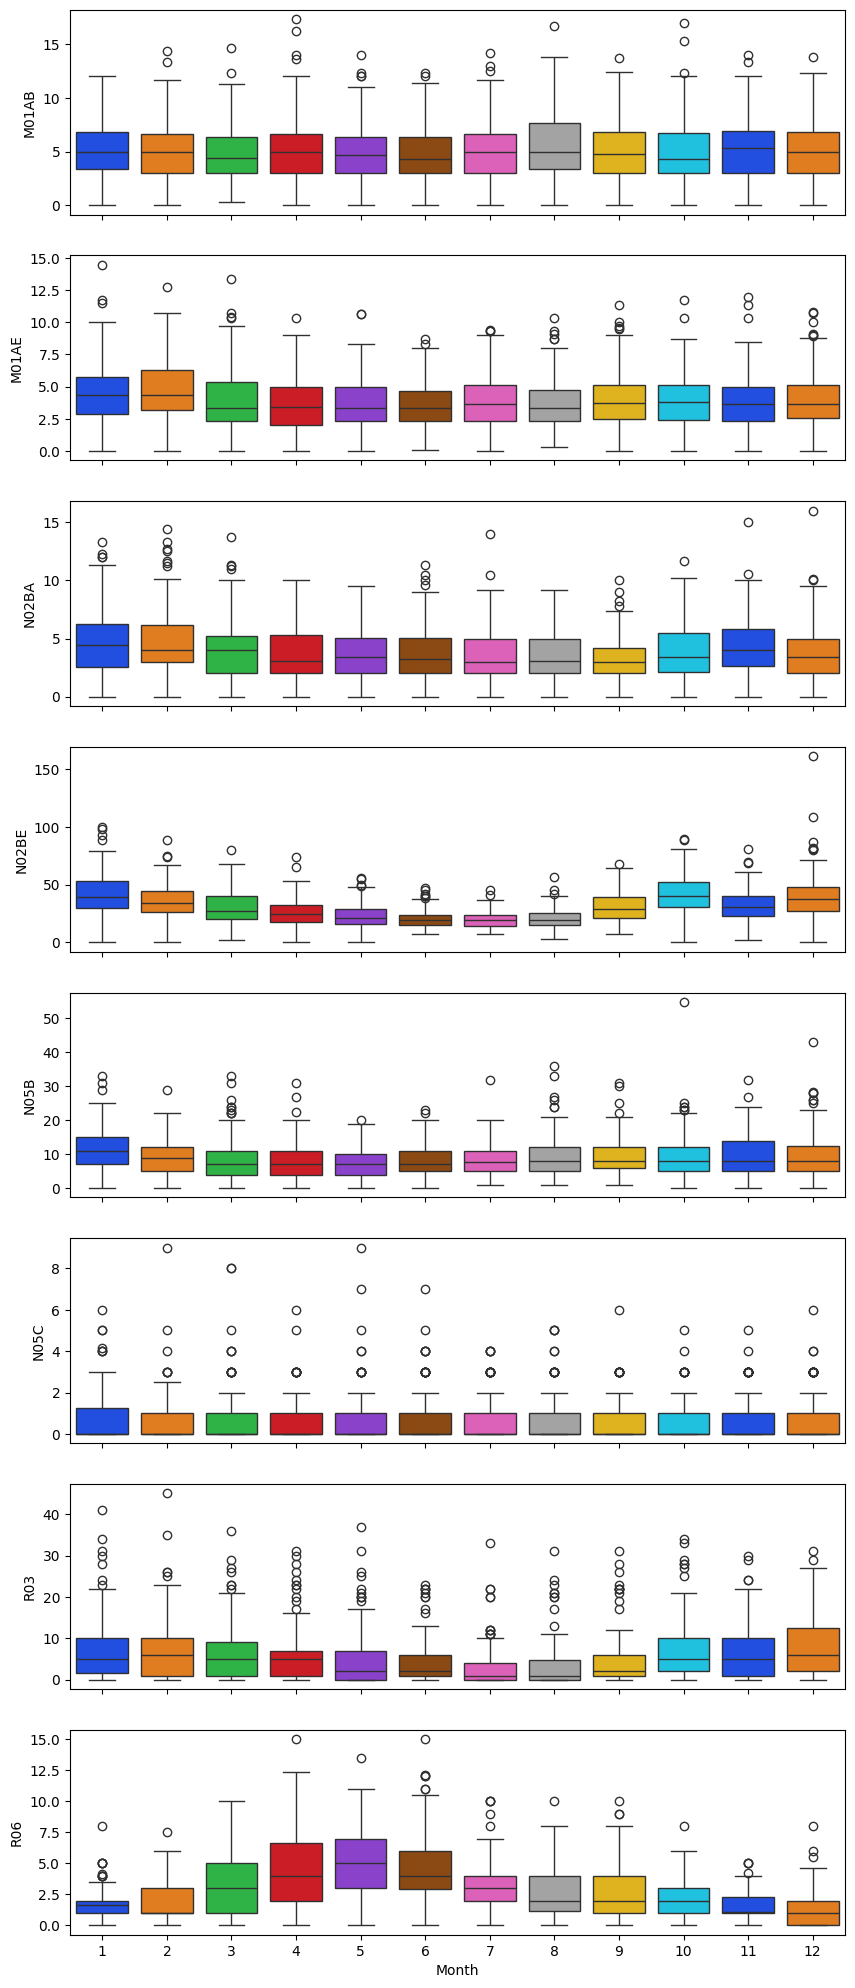

In [4]:
colnames = monthlysales.columns.tolist()[1:]
fig, axes = plt.subplots(8, 1, figsize = (10, 25), sharex = True)
for i,j in zip(colnames, axes):
    sns.boxplot(dailysales, x="Month", y=i, ax=j, palette = 'bright')

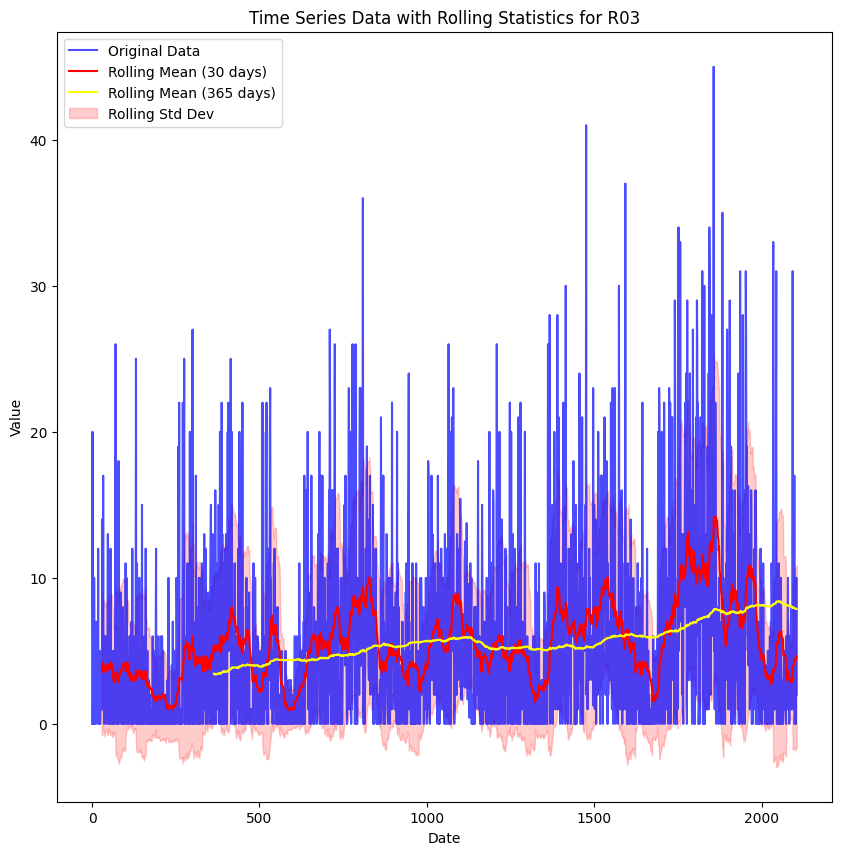

In [5]:
# Calculate rolling mean and standard deviation
window_size = 30  # Rolling window size (e.g., 7 days)
window_size2= 365
rolling_mean = dailysales['R03'].rolling(window=window_size).mean()
rolling_mean2 = dailysales['R03'].rolling(window=window_size2).mean()
rolling_std = dailysales['R03'].rolling(window=window_size).std()
rolling_std2 = dailysales['R03'].rolling(window=window_size2).std()
# Plot original time series data and rolling statistics
plt.figure(figsize=(10, 10))
plt.plot(dailysales.index, dailysales['R03'], label='Original Data', color='blue', alpha=0.7)
plt.plot(rolling_mean.index, rolling_mean, label=f'Rolling Mean ({window_size} days)', color='red')
plt.plot(rolling_mean2.index, rolling_mean2, label=f'Rolling Mean ({window_size2} days)', color='yellow')
plt.fill_between(rolling_std.index, rolling_mean - rolling_std, rolling_mean + rolling_std, color='red', alpha=0.2, label='Rolling Std Dev')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data with Rolling Statistics for R03')
plt.legend()
plt.show()

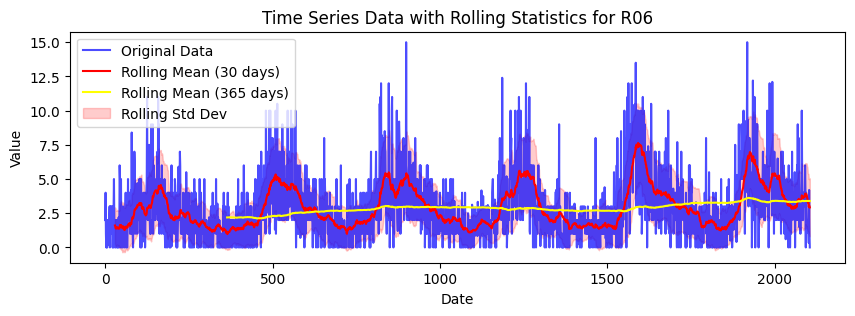

In [6]:
# Calculate rolling mean and standard deviation
window_size = 30  # Rolling window size (e.g., 7 days)
window_size2= 365
rolling_mean = dailysales['R06'].rolling(window=window_size).mean()
rolling_mean2 = dailysales['R06'].rolling(window=window_size2).mean()
rolling_std = dailysales['R06'].rolling(window=window_size).std()
rolling_std2 = dailysales['R06'].rolling(window=window_size2).std()
# Plot original time series data and rolling statistics
plt.figure(figsize=(10, 3))
plt.plot(dailysales.index, dailysales['R06'], label='Original Data', color='blue', alpha=0.7)
plt.plot(rolling_mean.index, rolling_mean, label=f'Rolling Mean ({window_size} days)', color='red')
plt.plot(rolling_mean2.index, rolling_mean2, label=f'Rolling Mean ({window_size2} days)', color='yellow')
plt.fill_between(rolling_std.index, rolling_mean - rolling_std, rolling_mean + rolling_std, color='red', alpha=0.2, label='Rolling Std Dev')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data with Rolling Statistics for R06')
plt.legend()
plt.show()

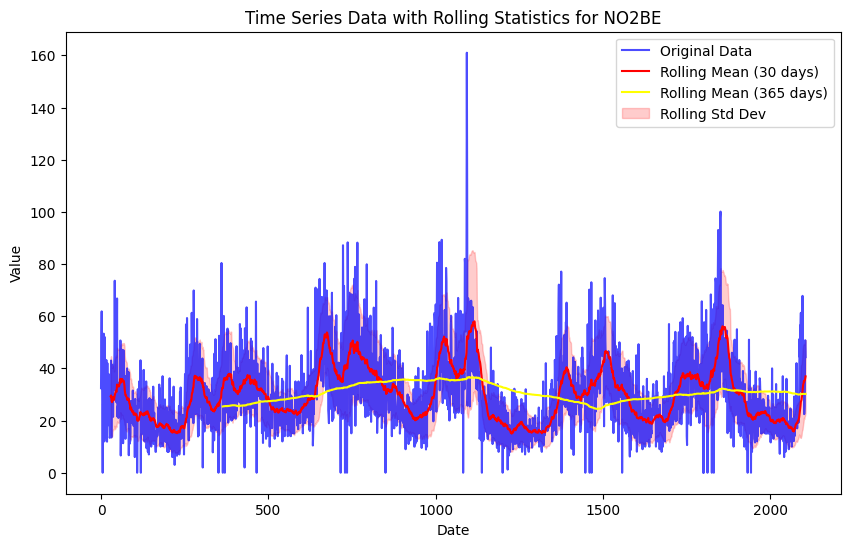

In [7]:
# Calculate rolling mean and standard deviation
window_size = 30  # Rolling window size (e.g., 7 days)
window_size2= 365
rolling_mean = dailysales['N02BE'].rolling(window=window_size).mean()
rolling_mean2 = dailysales['N02BE'].rolling(window=window_size2).mean()
rolling_std = dailysales['N02BE'].rolling(window=window_size).std()
rolling_std2 = dailysales['N02BE'].rolling(window=window_size2).std()
# Plot original time series data and rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(dailysales.index, dailysales['N02BE'], label='Original Data', color='blue', alpha=0.7)
plt.plot(rolling_mean.index, rolling_mean, label=f'Rolling Mean ({window_size} days)', color='red')
plt.plot(rolling_mean2.index, rolling_mean2, label=f'Rolling Mean ({window_size2} days)', color='yellow')
plt.fill_between(rolling_std.index, rolling_mean - rolling_std, rolling_mean + rolling_std, color='red', alpha=0.2, label='Rolling Std Dev')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data with Rolling Statistics for NO2BE')
plt.legend()
plt.show()

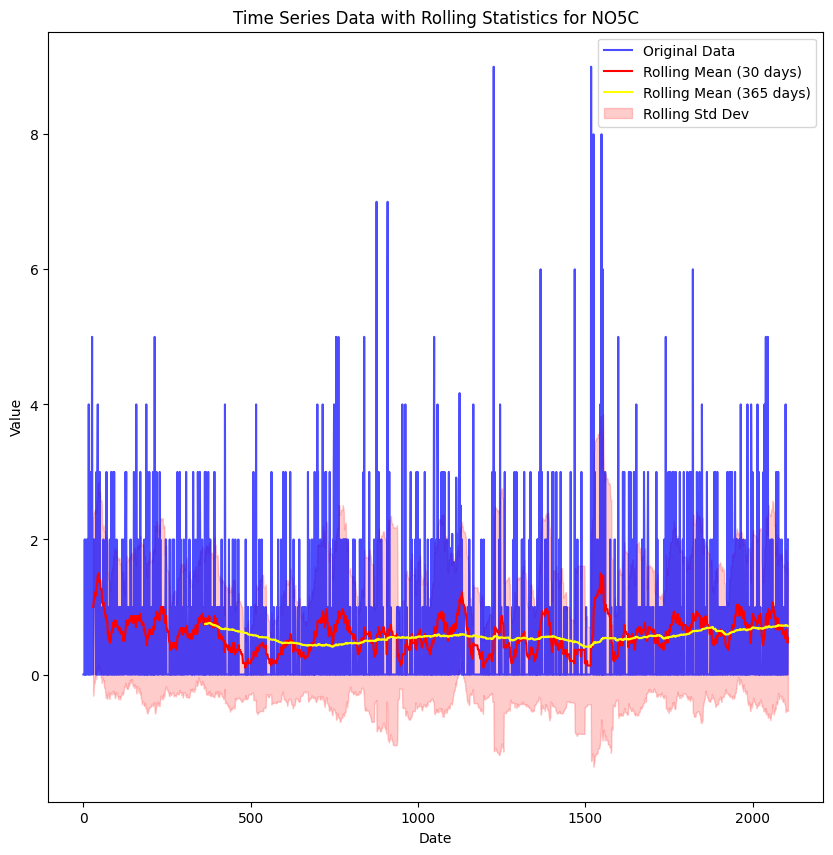

In [8]:
# Calculate rolling mean and standard deviation
window_size = 30  # Rolling window size (e.g., 7 days)
window_size2= 365
rolling_mean = dailysales['N05C'].rolling(window=window_size).mean()
rolling_mean2 = dailysales['N05C'].rolling(window=window_size2).mean()
rolling_std = dailysales['N05C'].rolling(window=window_size).std()
rolling_std2 = dailysales['N05C'].rolling(window=window_size2).std()
# Plot original time series data and rolling statistics
plt.figure(figsize=(10, 10))
plt.plot(dailysales.index, dailysales['N05C'], label='Original Data', color='blue', alpha=0.7)
plt.plot(rolling_mean.index, rolling_mean, label=f'Rolling Mean ({window_size} days)', color='red')
plt.plot(rolling_mean2.index, rolling_mean2, label=f'Rolling Mean ({window_size2} days)', color='yellow')
plt.fill_between(rolling_std.index, rolling_mean - rolling_std, rolling_mean + rolling_std, color='red', alpha=0.2, label='Rolling Std Dev')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data with Rolling Statistics for NO5C')
plt.legend()
plt.show()

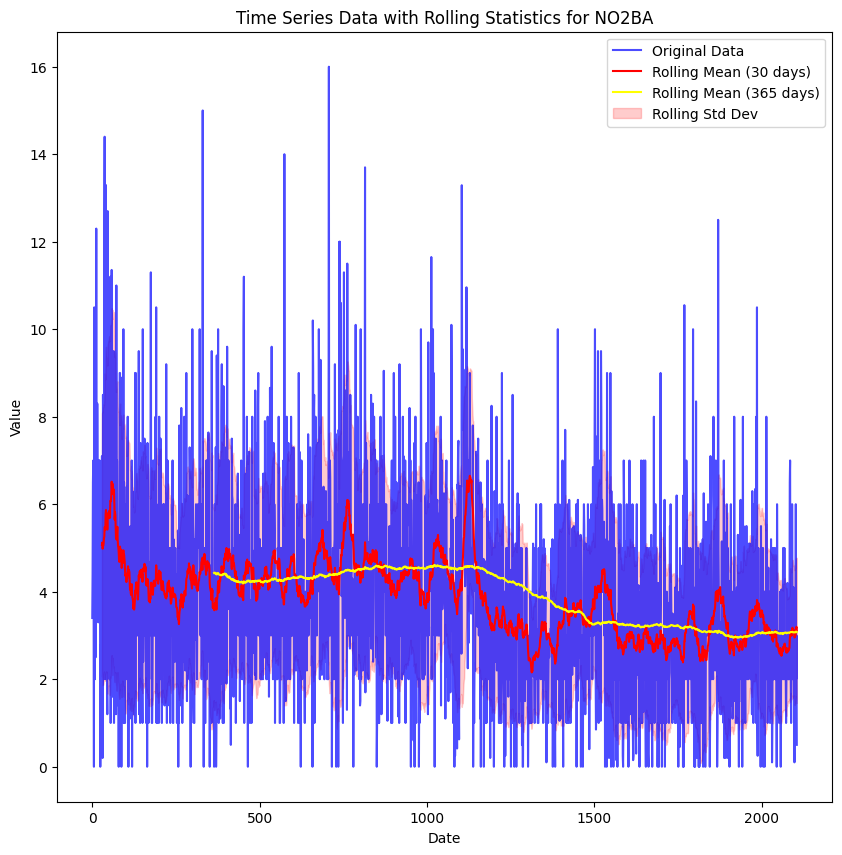

In [9]:
# Calculate rolling mean and standard deviation
window_size = 30  # Rolling window size (e.g., 7 days)
window_size2= 365
rolling_mean = dailysales['N02BA'].rolling(window=window_size).mean()
rolling_mean2 = dailysales['N02BA'].rolling(window=window_size2).mean()
rolling_std = dailysales['N02BA'].rolling(window=window_size).std()
rolling_std2 = dailysales['N02BA'].rolling(window=window_size2).std()
# Plot original time series data and rolling statistics
plt.figure(figsize=(10, 10))
plt.plot(dailysales.index, dailysales['N02BA'], label='Original Data', color='blue', alpha=0.7)
plt.plot(rolling_mean.index, rolling_mean, label=f'Rolling Mean ({window_size} days)', color='red')
plt.plot(rolling_mean2.index, rolling_mean2, label=f'Rolling Mean ({window_size2} days)', color='yellow')
plt.fill_between(rolling_std.index, rolling_mean - rolling_std, rolling_mean + rolling_std, color='red', alpha=0.2, label='Rolling Std Dev')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data with Rolling Statistics for NO2BA')
plt.legend()
plt.show()

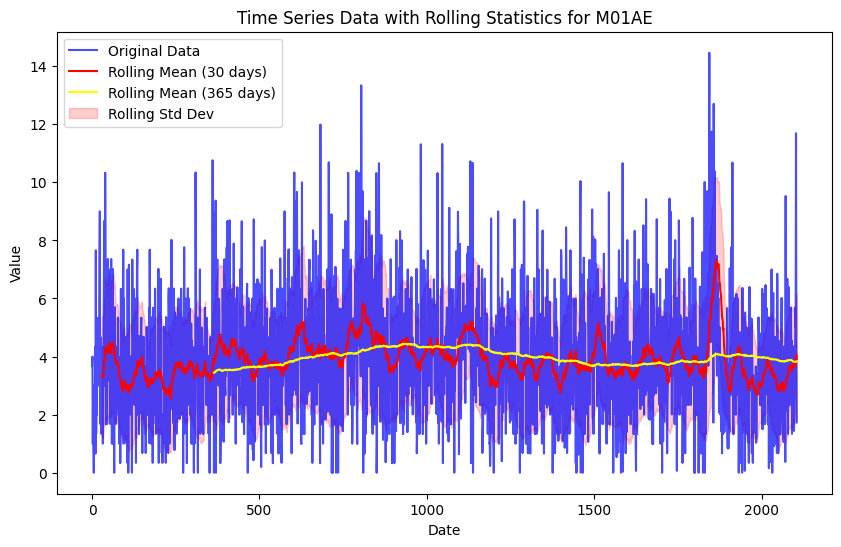

In [10]:
# Calculate rolling mean and standard deviation
window_size = 30  # Rolling window size (e.g., 7 days)
window_size2= 365
rolling_mean = dailysales['M01AE'].rolling(window=window_size).mean()
rolling_mean2 = dailysales['M01AE'].rolling(window=window_size2).mean()
rolling_std = dailysales['M01AE'].rolling(window=window_size).std()
rolling_std2 = dailysales['M01AE'].rolling(window=window_size2).std()
# Plot original time series data and rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(dailysales.index, dailysales['M01AE'], label='Original Data', color='blue', alpha=0.7)
plt.plot(rolling_mean.index, rolling_mean, label=f'Rolling Mean ({window_size} days)', color='red')
plt.plot(rolling_mean2.index, rolling_mean2, label=f'Rolling Mean ({window_size2} days)', color='yellow')
plt.fill_between(rolling_std.index, rolling_mean - rolling_std, rolling_mean + rolling_std, color='red', alpha=0.2, label='Rolling Std Dev')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data with Rolling Statistics for M01AE')
plt.legend()
plt.show()

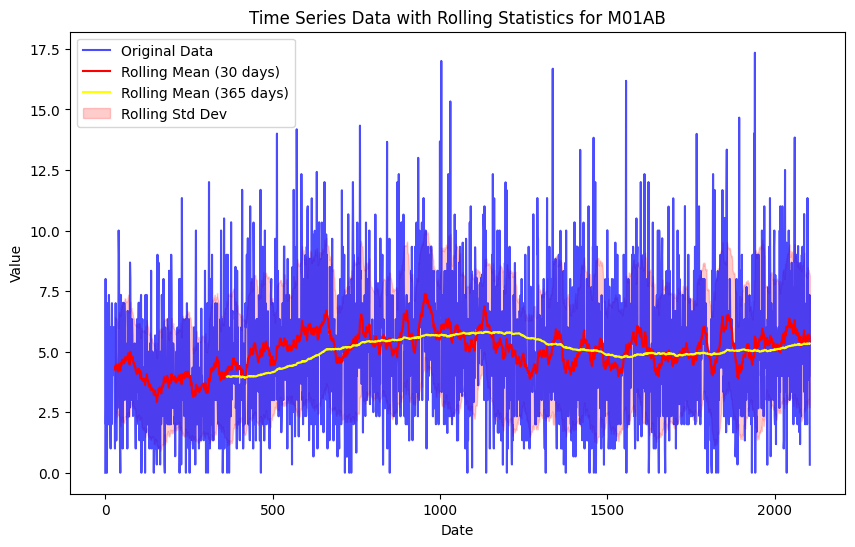

In [11]:
# Calculate rolling mean and standard deviation
window_size = 30  # Rolling window size (e.g., 7 days)
window_size2= 365
rolling_mean = dailysales['M01AB'].rolling(window=window_size).mean()
rolling_mean2 = dailysales['M01AB'].rolling(window=window_size2).mean()
rolling_std = dailysales['M01AB'].rolling(window=window_size).std()
rolling_std2 = dailysales['M01AB'].rolling(window=window_size2).std()
# Plot original time series data and rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(dailysales.index, dailysales['M01AB'], label='Original Data', color='blue', alpha=0.7)
plt.plot(rolling_mean.index, rolling_mean, label=f'Rolling Mean ({window_size} days)', color='red')
plt.plot(rolling_mean2.index, rolling_mean2, label=f'Rolling Mean ({window_size2} days)', color='yellow')
plt.fill_between(rolling_std.index, rolling_mean - rolling_std, rolling_mean + rolling_std, color='red', alpha=0.2, label='Rolling Std Dev')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data with Rolling Statistics for M01AB')
plt.legend()
plt.show()

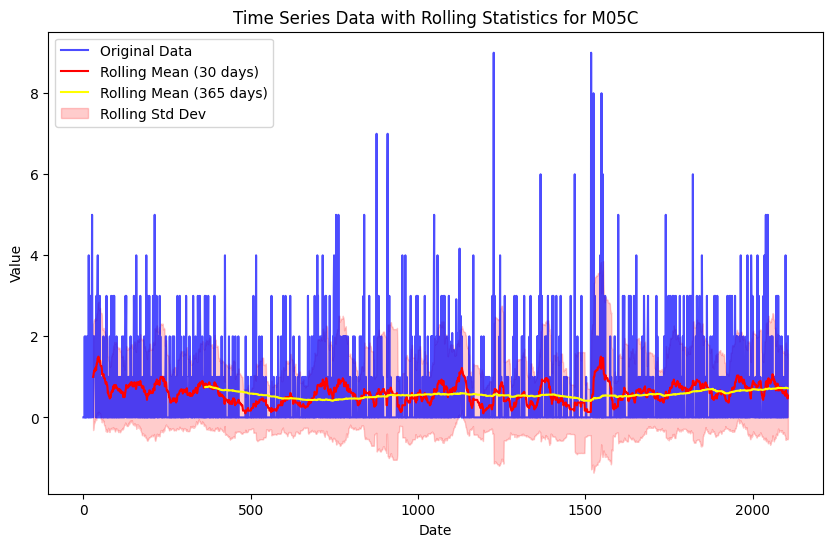

In [12]:
# Calculate rolling mean and standard deviation
window_size = 30  # Rolling window size (e.g., 7 days)
window_size2= 365
rolling_mean = dailysales['N05C'].rolling(window=window_size).mean()
rolling_mean2 = dailysales['N05C'].rolling(window=window_size2).mean()
rolling_std = dailysales['N05C'].rolling(window=window_size).std()
rolling_std2 = dailysales['N05C'].rolling(window=window_size2).std()
# Plot original time series data and rolling statistics
plt.figure(figsize=(10, 6))
plt.plot(dailysales.index, dailysales['N05C'], label='Original Data', color='blue', alpha=0.7)
plt.plot(rolling_mean.index, rolling_mean, label=f'Rolling Mean ({window_size} days)', color='red')
plt.plot(rolling_mean2.index, rolling_mean2, label=f'Rolling Mean ({window_size2} days)', color='yellow')
plt.fill_between(rolling_std.index, rolling_mean - rolling_std, rolling_mean + rolling_std, color='red', alpha=0.2, label='Rolling Std Dev')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Time Series Data with Rolling Statistics for M05C')
plt.legend()
plt.show()

Stationarity Analysis

In [13]:
dailysales.columns.to_list()

['datum',
 'M01AB',
 'M01AE',
 'N02BA',
 'N02BE',
 'N05B',
 'N05C',
 'R03',
 'R06',
 'Year',
 'Month',
 'Hour',
 'Weekday Name']

In [14]:
ds = dailysales.drop(columns =['Year', 'Month', 'Hour', 'Weekday Name'])

In [15]:
for column in ds.columns:
    if column != 'datum':  # Skip datetime index column
        product_sales = ds[column]
        
        # Perform ADF test on the current product's sales data
        result = adfuller(product_sales)
        
        # Extract and print test results
        print(f'ADF Test Results for {column}:')
        print('ADF Statistic:', result[0])
        print('p-value:', result[1])
        print('Critical Values:')
        for key, value in result[4].items():
            print(f'   {key}: {value}')
        
        # Interpret test results
        if result[1] <= 0.05:
            print(f'Reject the null hypothesis (H0) for {column}: Time series is stationary')
        else:
            print(f'Fail to reject the null hypothesis (H0) for {column}: Time series is non-stationary')
        
        print('--------------------------------------')

ADF Test Results for M01AB:
ADF Statistic: -8.279356934138956
p-value: 4.563943367500582e-13
Critical Values:
   1%: -3.433481203206757
   5%: -2.862923230045995
   10%: -2.5675063669901363
Reject the null hypothesis (H0) for M01AB: Time series is stationary
--------------------------------------
ADF Test Results for M01AE:
ADF Statistic: -7.472604429706552
p-value: 5.008856420708148e-11
Critical Values:
   1%: -3.4334917336814543
   5%: -2.862927879505365
   10%: -2.567508842556946
Reject the null hypothesis (H0) for M01AE: Time series is stationary
--------------------------------------
ADF Test Results for N02BA:
ADF Statistic: -6.135329852530945
p-value: 8.213354081011565e-08
Critical Values:
   1%: -3.433485707610957
   5%: -2.8629252188514385
   10%: -2.5675074259130812
Reject the null hypothesis (H0) for N02BA: Time series is stationary
--------------------------------------
ADF Test Results for N02BE:
ADF Statistic: -4.193657002499541
p-value: 0.0006753809397488172
Critical Val

In [16]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

<Figure size 1200x600 with 0 Axes>

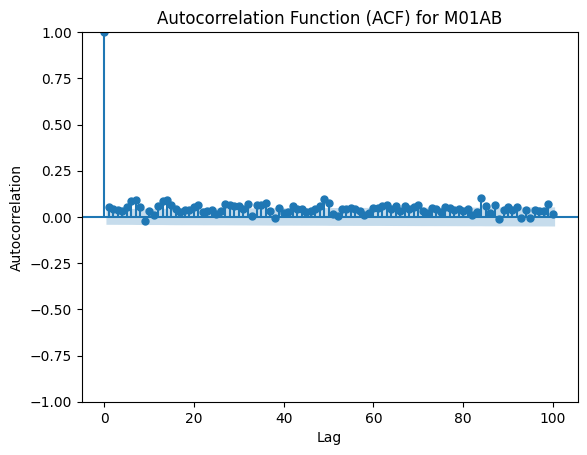

<Figure size 1200x600 with 0 Axes>

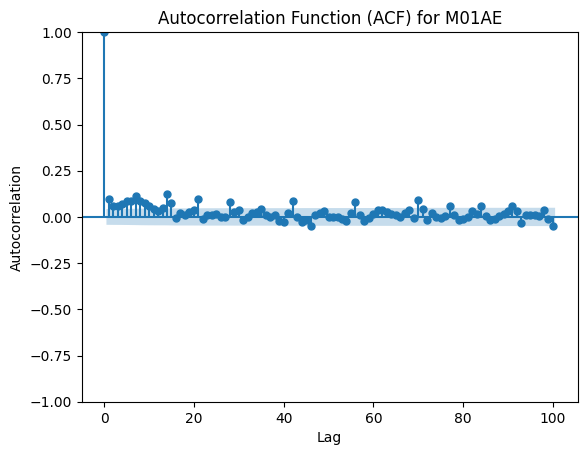

<Figure size 1200x600 with 0 Axes>

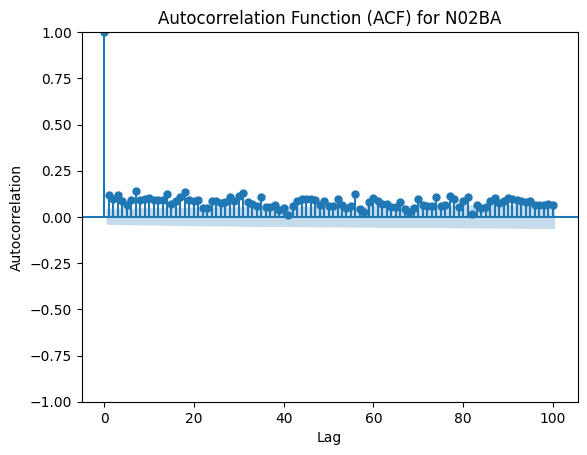

<Figure size 1200x600 with 0 Axes>

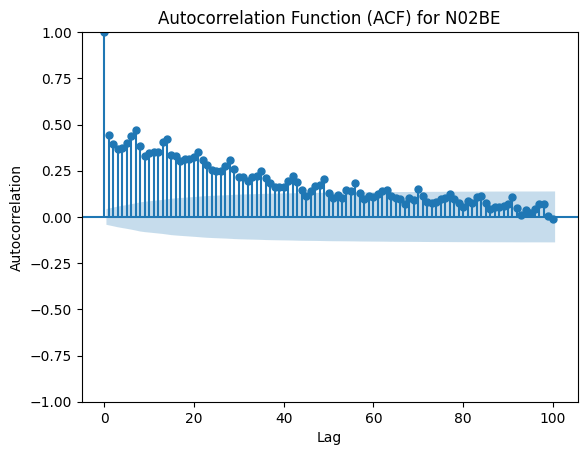

<Figure size 1200x600 with 0 Axes>

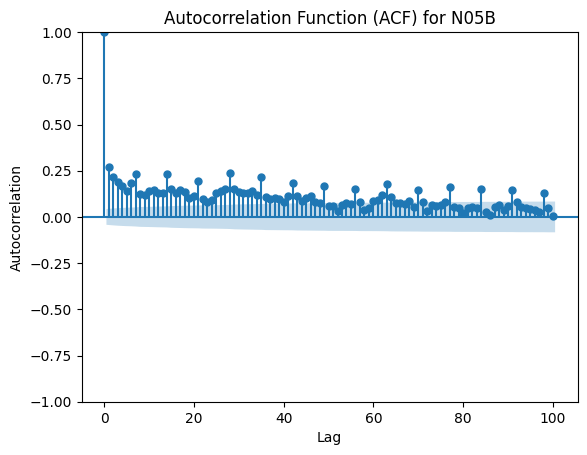

<Figure size 1200x600 with 0 Axes>

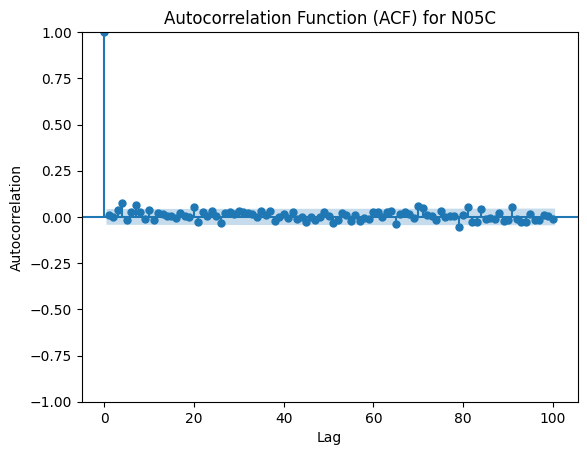

<Figure size 1200x600 with 0 Axes>

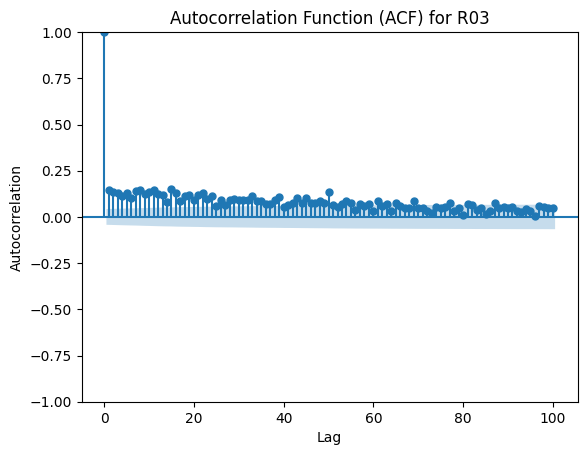

<Figure size 1200x600 with 0 Axes>

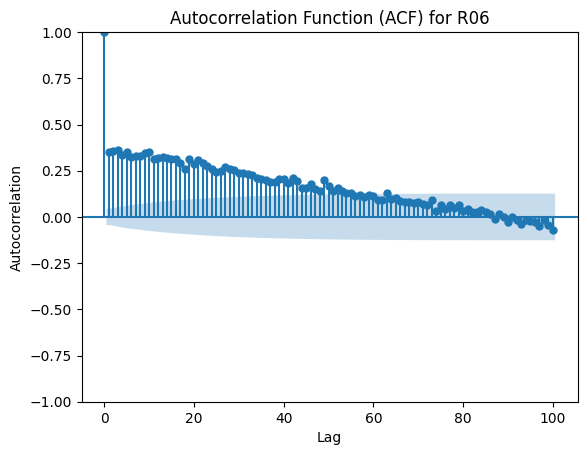

In [17]:
for column in ds.columns:
    if column != 'datum':  # Skip datetime index column
        product_sales = ds[column]
        plt.figure(figsize=(12, 6))
        plot_acf(product_sales, lags=100, title='Autocorrelation Function (ACF) for '+ str(column))
        plt.xlabel('Lag')
        plt.ylabel("Autocorrelation")
        plt.show()

<Figure size 1200x600 with 0 Axes>

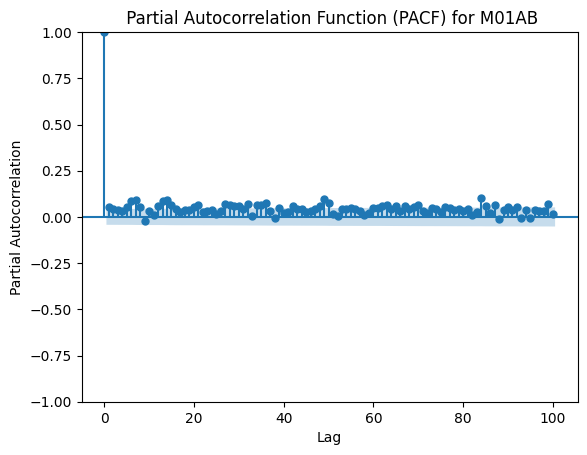

<Figure size 1200x600 with 0 Axes>

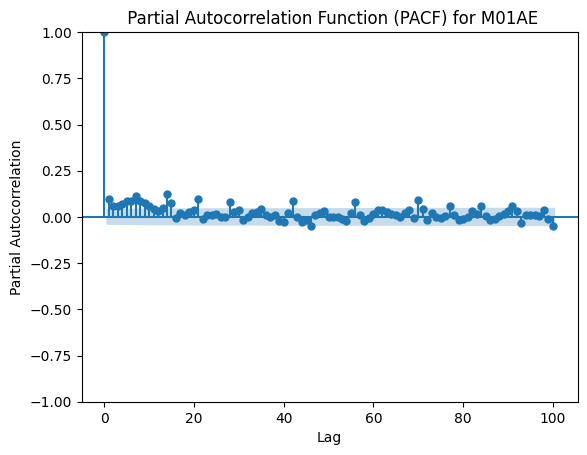

<Figure size 1200x600 with 0 Axes>

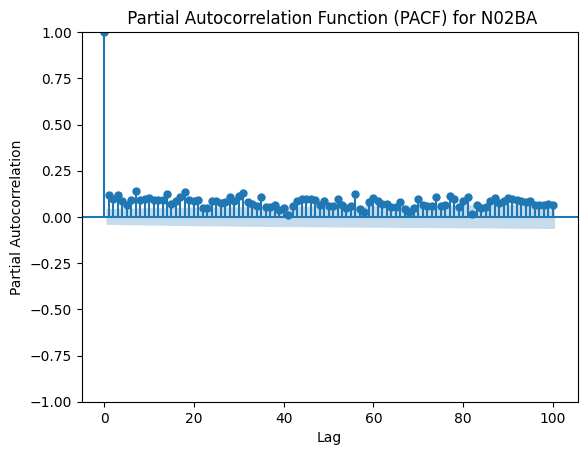

<Figure size 1200x600 with 0 Axes>

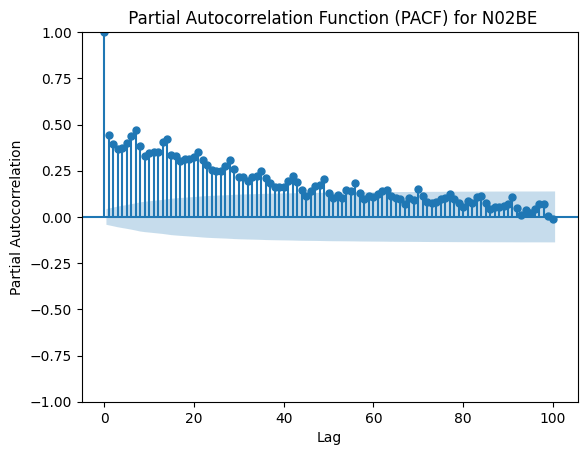

<Figure size 1200x600 with 0 Axes>

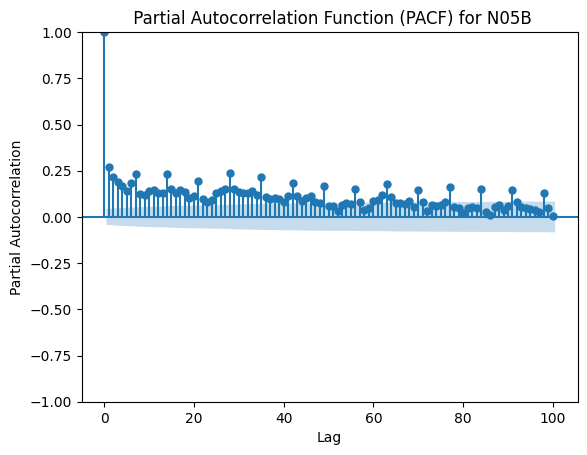

<Figure size 1200x600 with 0 Axes>

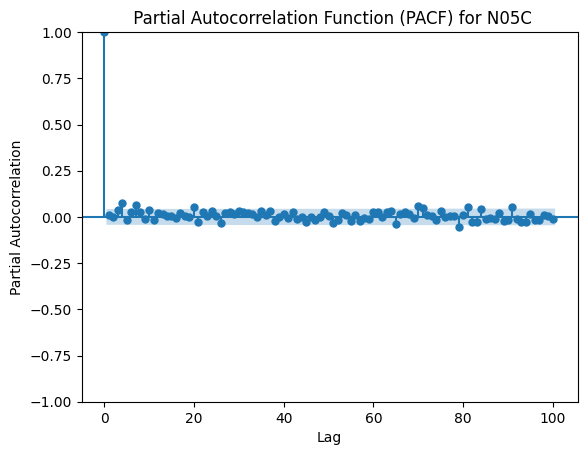

<Figure size 1200x600 with 0 Axes>

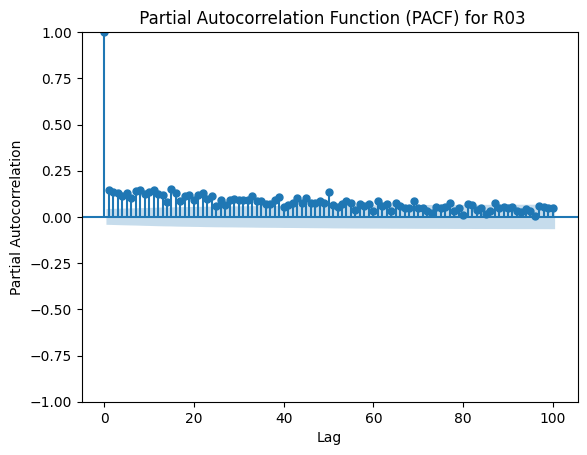

<Figure size 1200x600 with 0 Axes>

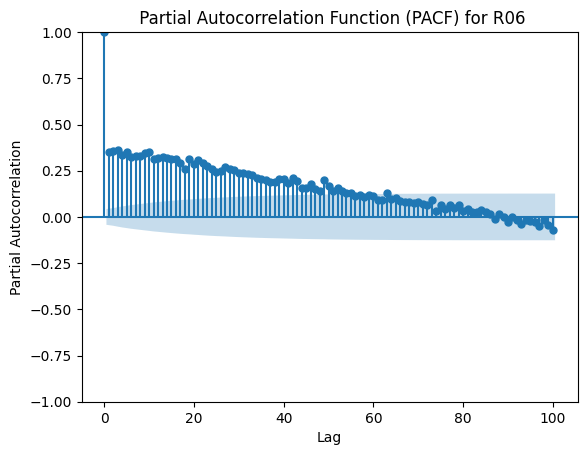

In [18]:
for column in ds.columns:
    if column != 'datum':  # Skip datetime index column
        product_sales = ds[column]
        plt.figure(figsize=(12, 6))
        plot_acf(product_sales, lags=100, title=' Partial Autocorrelation Function (PACF) for '+ str(column))
        plt.xlabel('Lag')
        plt.ylabel("Partial Autocorrelation")
        plt.show()

ARIMA Forecasting

In [19]:
import warnings
warnings.filterwarnings("ignore")

In [20]:
def eval_ar_model(data, train_size=0.8, order=(1, 0, 1), test_size=None):
    """
    Split the time series data into training and test sets, fit an ARIMA model on the training data,
    make predictions on the test data, and calculate the Mean Squared Error (MSE).

    Parameters:
    - data (array-like): The time series data.
    - train_size (float): The proportion of data to use for training (default: 0.8).
    - order (tuple): The (p, d, q) order of the ARIMA model (default: (1, 0, 1)).
    - test_size (int or None): The number of data points to use for testing.
                               If None, use the remainder of the data after training size.

    Returns:
    - float: The Mean Squared Error (MSE) between predicted and actual values.
    """

    # Determine the split index based on train_size
    split_index = int(len(data) * train_size)
    
    # Split the data into training and test sets
    train_data = data[:split_index]
    if test_size is None:
        test_data = data[split_index:]
    else:
        test_data = data[split_index:split_index + test_size]
    
    # Fit ARIMA model on the training data
    model = ARIMA(train_data, order=order)
    fitted_model = model.fit()
    
    # Make predictions on the test data
    predictions = fitted_model.forecast(steps=len(test_data))
    
    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(test_data, predictions)
    
    return mse


In [21]:
def eval_model(colname, data, p_vals, d_vals, q_vals):
    best_mse, best_par = float("inf"), None
    for p in p_vals:
        for d in d_vals:
            for q in q_vals:
                o = (p, d, q)
                try:
                    mse = eval_ar_model(data, order=o)
                    if mse < best_mse:
                        best_mse, best_par = mse, o
                except:
                    continue
    print(colname+'-Best ARIMA params are %s with a MSE of %.3f' % (best_par, best_mse))



In [22]:
for colname in colnames:
    eval_model(colname, weeklysales[colname].values, range(0,6), range(0,6), range(0,6))

M01AB-Best ARIMA params are (1, 2, 1) with a MSE of 60.322
M01AE-Best ARIMA params are (3, 4, 5) with a MSE of 83.407
N02BA-Best ARIMA params are (4, 2, 2) with a MSE of 28.940
N02BE-Best ARIMA params are (0, 0, 2) with a MSE of 6111.095
N05B-Best ARIMA params are (4, 1, 1) with a MSE of 146.322
N05C-Best ARIMA params are (1, 4, 3) with a MSE of 7.040
R03-Best ARIMA params are (0, 0, 1) with a MSE of 1208.085
R06-Best ARIMA params are (3, 0, 5) with a MSE of 110.513


In [23]:
weeklysales.head(5)

,datum,M01AB,M01AE,N02BA,N02BE,N05B,N05C,R03,R06
0,1/5/2014,14.00,11.67,21.3,185.95,41.0,0.0,32.0,7.0
1,1/12/2014,29.33,12.68,37.9,190.70,88.0,5.0,21.0,7.2
2,1/19/2014,30.67,26.34,45.9,218.40,80.0,8.0,29.0,12.0
3,1/26/2014,34.00,32.37,31.5,179.60,80.0,8.0,23.0,10.0
4,2/2/2014,31.02,23.35,20.7,159.88,84.0,12.0,29.0,12.0


In [24]:
M01ABops = (1,2,1)
M01AEops = (3,4,5)
N02BAops = (4,2,2)
N02BEops = (0,0,2)
N05Bops = (4,1,1)
N05Cops = (1,4,3)
R03ops = (0,0,1)
R06ops = (3,0,5)

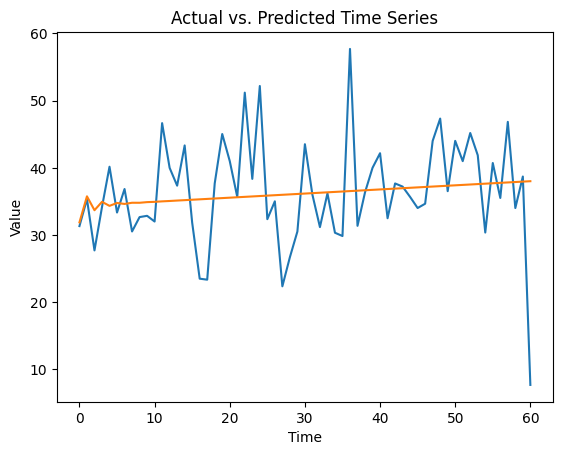

In [25]:
def plot_ar_model(data, train_size=0.8, order=(1, 0, 1), test_size=None):
    """
    Split the time series data into training and test sets, fit an ARIMA model on the training data,
    make predictions on the test data, and plot the test data and predictions

    Parameters:
    - data (array-like): The time series data.
    - train_size (float): The proportion of data to use for training (default: 0.8).
    - order (tuple): The (p, d, q) order of the ARIMA model (default: (1, 0, 1)).
    - test_size (int or None): The number of data points to use for testing.
                               If None, use the remainder of the data after training size.

    Returns:
    - float: The Mean Squared Error (MSE) between predicted and actual values.
    """

    # Determine the split index based on train_size
    split_index = int(len(data) * train_size)
    
    # Split the data into training and test sets
    train_data = data[:split_index]
    if test_size is None:
        test_data = data[split_index:]
    else:
        test_data = data[split_index:split_index + test_size]
    
    # Fit ARIMA model on the training data
    model = ARIMA(train_data, order=order)
    fitted_model = model.fit()
    
    # Make predictions on the test data
    predictions = fitted_model.forecast(steps=len(test_data))
    
    plt.plot(test_data)
    plt.plot(predictions)
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Actual vs. Predicted Time Series')
    plt.show()
    return

plot_ar_model(weeklysales['M01AB'].values, order = M01ABops)

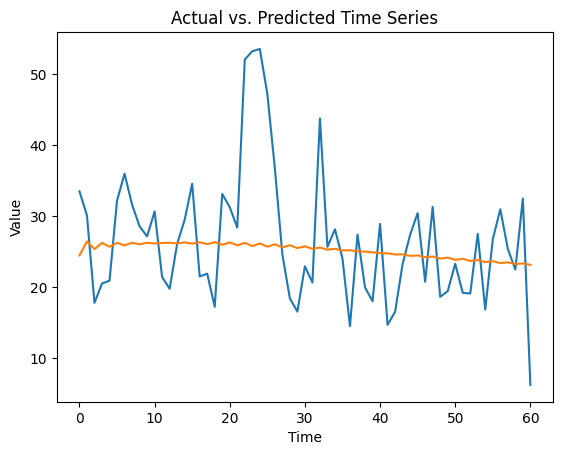

In [26]:
plot_ar_model(weeklysales['M01AE'].values, order = M01AEops)

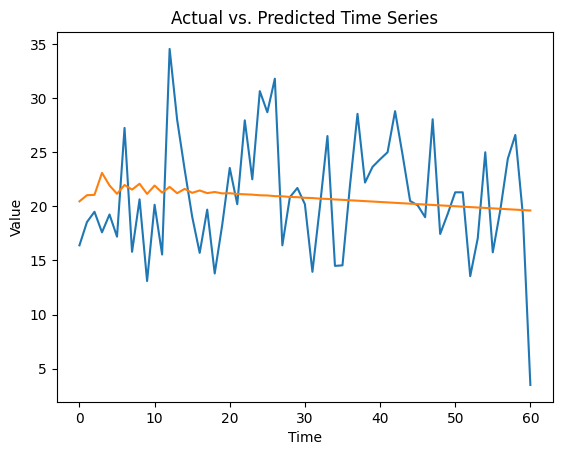

In [27]:
plot_ar_model(weeklysales['N02BA'].values, order = N02BAops)

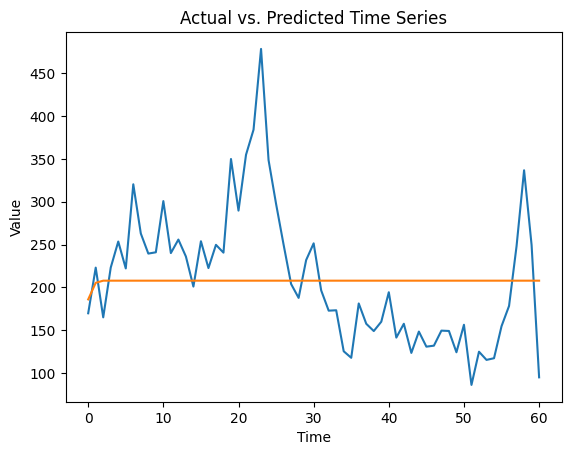

In [28]:
plot_ar_model(weeklysales['N02BE'].values, order = N02BEops)

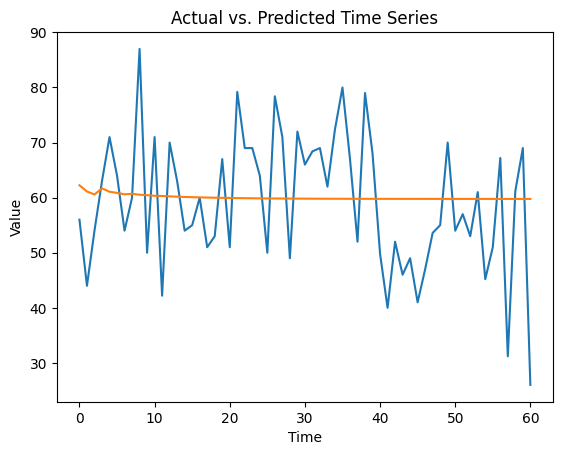

In [29]:
plot_ar_model(weeklysales['N05B'].values, order = N05Bops)

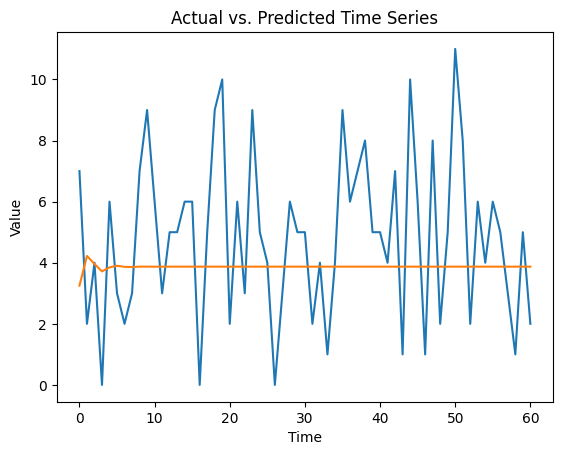

In [30]:
plot_ar_model(weeklysales['N05C'].values, order = N05Bops)

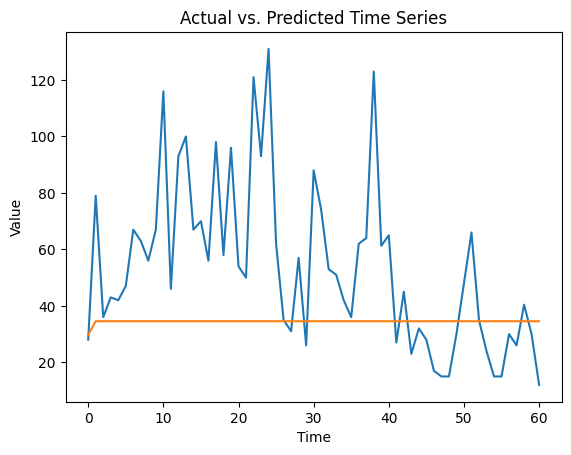

In [31]:
plot_ar_model(weeklysales['R03'].values, order = R03ops)

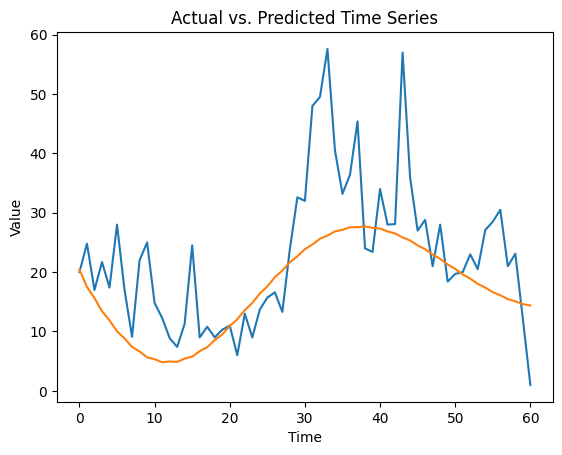

In [32]:
plot_ar_model(weeklysales['R06'].values, order = R06ops)

LSTM

In [33]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [34]:
def generate_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i+seq_length])
        y.append(data[i+seq_length])
    return np.array(X), np.array(y)

def eval_lstm_model(data, train_size=0.8, test_size=None):
    
    # Determine the split index based on train_size
    split_index = int(len(data) * train_size)
    
    # Split the data into training and test sets
    train_data = data[:split_index]
    if test_size is None:
        test_data = data[split_index:]
    else:
        test_data = data[split_index:split_index + test_size]

    # Normalize the data 
    max_value = np.max(data)
    train_data = train_data / max_value
    test_data = test_data / max_value
    
    # Define sequence length (number of time steps to consider)
    seq_length = 10

    # Generate training sequences
    X_train, y_train = generate_sequences(train_data, seq_length)
    X_train = X_train.reshape((X_train.shape[0], seq_length, 1))

    # Build LSTM model
    model = Sequential()
    model.add(LSTM(64, input_shape=(seq_length, 1)))  # LSTM layer with 64 units
    model.add(Dense(1))  # Output layer (single value prediction)
    model.compile(optimizer='adam', loss='mean_squared_error')
    model.fit(X_train, y_train, epochs=50, batch_size=32)

    # Generate test sequences
    X_test, y_test = generate_sequences(test_data, seq_length)
    X_test = X_test.reshape((X_test.shape[0], seq_length, 1))

    # Make predictions with the LSTM model
    y_pred = model.predict(X_test)

    # Inverse transform predictions and actual values 
    y_pred = y_pred * max_value
    y_test = y_test * max_value

    # Calculate Mean Squared Error (MSE)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Mean Squared Error (MSE): {mse}")

    # Plot predicted vs actual test values
    plt.figure(figsize=(10, 6))
    plt.plot(y_test, label='Actual', color='blue', linestyle='-')
    plt.plot(y_pred, label='Predicted', color='red', linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Value')
    plt.title('Predicted vs Actual Time Series (Test Data)')
    plt.legend()
    plt.grid(True)
    plt.show()
    
    return 

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.3222
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0864 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0226 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0193 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0187 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0163 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0144 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0150 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0128 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0143 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0154 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0149 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0148 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0144 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0164 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━

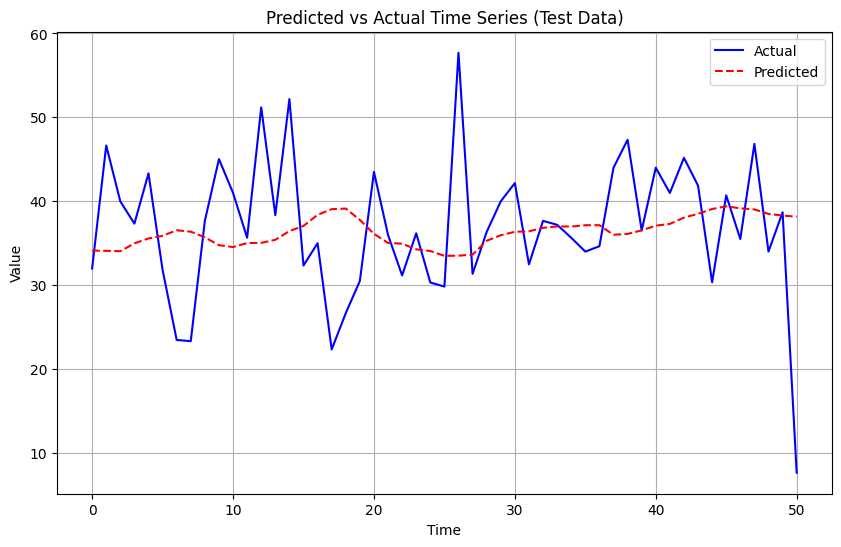

In [35]:
eval_lstm_model(weeklysales['M01AB'].values)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2505
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0377 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0300 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0143 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0163 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0120 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0125 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0128 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0126 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0130 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0131 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0140 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0130 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0131 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0123 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━

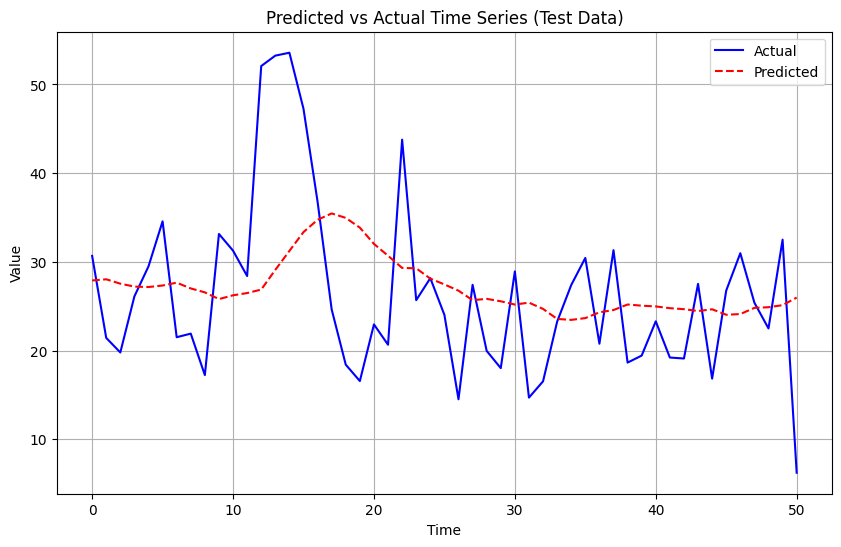

In [36]:
eval_lstm_model(weeklysales['M01AE'].values)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1341
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0194 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0234 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0151 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0153 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0117 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0118 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0138 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0144 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0112 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0130 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0121 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0123 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0128 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0147 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━

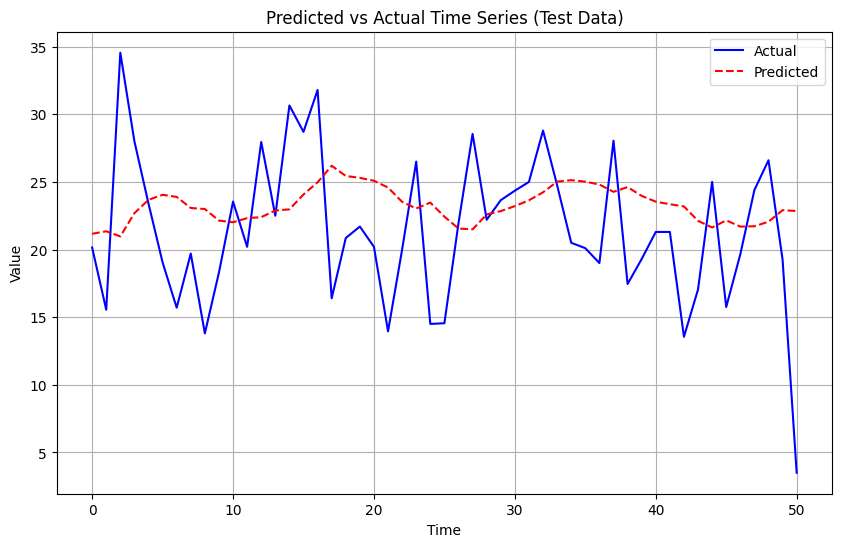

In [37]:
eval_lstm_model(weeklysales['N02BA'].values)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1492
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0320 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0189 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0148 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0133 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0124 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0125 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0124 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0147 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0109 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0122 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0103 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0121 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0120 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0123 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━

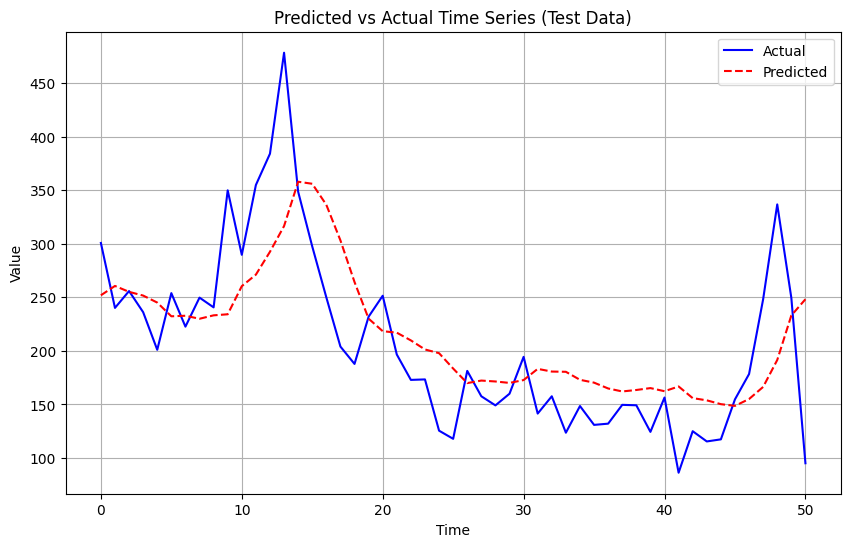

In [38]:
eval_lstm_model(weeklysales['N02BE'].values)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1015
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0193 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0244 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0181 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0179 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0155 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0175 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0178 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0164 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0166 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0154 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0158 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0150 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0146 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0189 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━

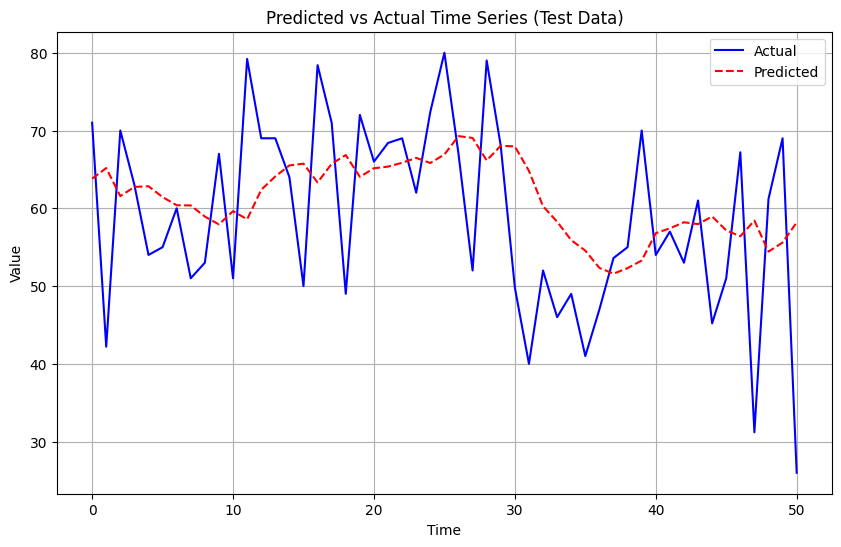

In [39]:
eval_lstm_model(weeklysales['N05B'].values)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0600
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0346 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0319 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0372 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0381 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0357 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0399 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0315 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0340 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0385 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0334 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0296 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0267 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0346 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0312 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━

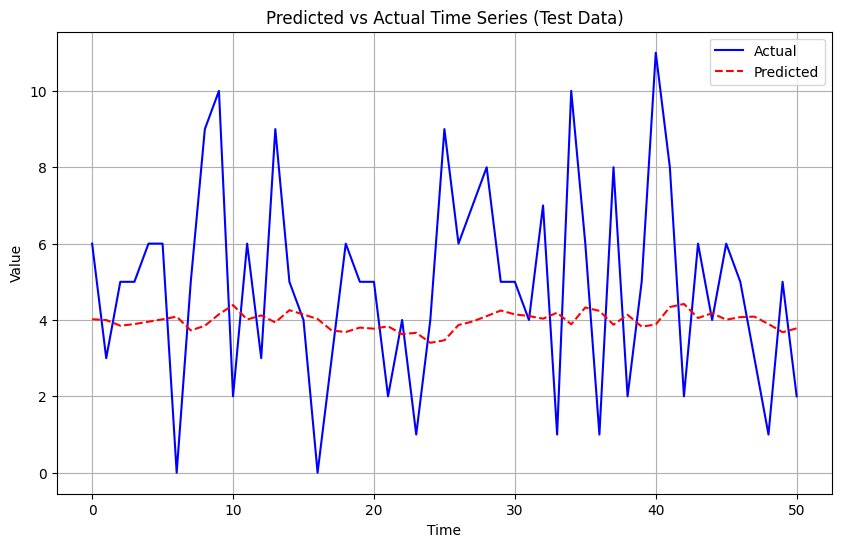

In [40]:
eval_lstm_model(weeklysales['N05C'].values)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0554
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0182 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0204 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0168 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0188 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0159 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0196 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0204 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0160 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0175 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0168 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0154 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0144 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0199 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0164 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━

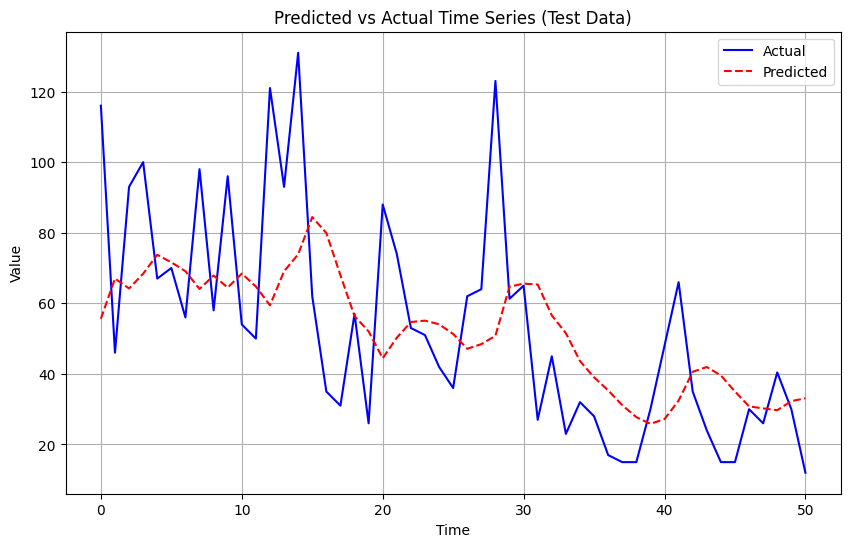

In [41]:
eval_lstm_model(weeklysales['R03'].values)

Epoch 1/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0645
Epoch 2/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0188 
Epoch 3/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0186 
Epoch 4/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0180 
Epoch 5/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0178 
Epoch 6/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0138 
Epoch 7/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0169 
Epoch 8/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0169 
Epoch 9/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0120 
Epoch 10/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0170 
Epoch 11/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0152 
Epoch 12/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0152 
Epoch 13/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0152 
Epoch 14/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0134 
Epoch 15/50
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0154 
Epoch 16/50
8/8 ━━━━━━━━━━━━━━━━━━━

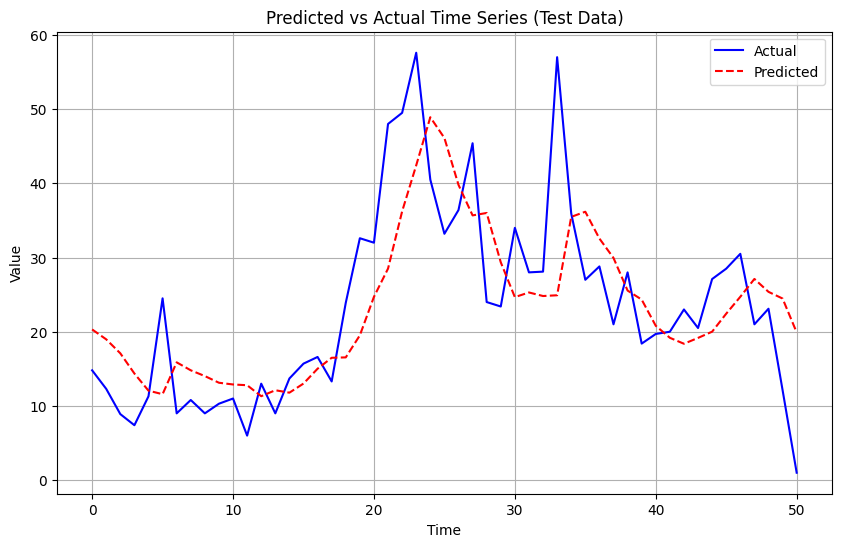

In [42]:
eval_lstm_model(weeklysales['R06'].values)

In [43]:
weeklysales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 302 entries, 0 to 301
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   datum   302 non-null    object 
 1   M01AB   302 non-null    float64
 2   M01AE   302 non-null    float64
 3   N02BA   302 non-null    float64
 4   N02BE   302 non-null    float64
 5   N05B    302 non-null    float64
 6   N05C    302 non-null    float64
 7   R03     302 non-null    float64
 8   R06     302 non-null    float64
dtypes: float64(8), object(1)
memory usage: 21.4+ KB
